# Example of match data analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sf6_match_collection import scrapp_sf6_matches

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
PLAYER_SID = 1572500566 # MDZ_Jimmy
# PLAYER_SID: int = 3570388222 # Broski

scrapp_sf6_matches(PLAYER_SID)

This script will save on 'player_1572500566_sf6_matches.xlsx' file. Make sure it is closed and press ENTER to proceed.

Fetching the last 100 matches...


100%|██████████| 10/10 [00:08<00:00,  1.12it/s]



Total of 0 new matche(s) retrieved.
280 matches are now saved in 'player_1572500566_sf6_matches.xlsx' file.



In [3]:
file_name = f"player_{PLAYER_SID}_sf6_matches.xlsx"

In [4]:
data = pd.read_excel(file_name)
data["left_side"] = data["left_side"].map({0: "Right side", 1: "Left Side"})

last_day = str(data["uploaded_at"].max().date())

df_last_session = data[data["uploaded_at"].map(lambda d: str(d.date()) == last_day)]
data.head(n=5)

,main_player_name,main_player_sid,main_player_character,main_player_score,main_player_league_rank,main_player_lp,main_player_mr,main_player_mr_ranking,main_player_input_type,main_player_platform,opposite_player_name,opposite_player_sid,opposite_player_character,opposite_player_score,opposite_player_league_rank,opposite_player_lp,opposite_player_mr,opposite_player_mr_ranking,opposite_player_input_type,opposite_player_platform,match_won,left_side,uploaded_at,replay_id,replay_battle_type_name
0,MDZ_jimmY,1572500566,Ryu,0,36,382115,1797,2645,0,Steam,Yunie,2867447641,Cammy,2,36,381933,1742,2645,0,Steam,0,Right side,2025-02-19 20:46:32,EUPTW8C5F,Ranked Match
1,MDZ_jimmY,1572500566,Ryu,1,36,382155,1807,1855,0,Steam,Yunie,2867447641,Cammy,2,36,381881,1732,1855,0,Steam,0,Right side,2025-02-19 20:44:49,D3KKPTKQL,Ranked Match
2,MDZ_jimmY,1572500566,Ryu,0,36,382195,1815,1549,0,Steam,KiDrinkAndDrive,2491419121,Jamie,2,36,390381,1796,1549,0,Steam,0,Left Side,2025-02-19 20:40:05,K7DVY7K6S,Ranked Match
3,MDZ_jimmY,1572500566,Ryu,1,36,382235,1824,1380,0,Steam,KiDrinkAndDrive,2491419121,Jamie,2,36,390331,1787,1380,0,Steam,0,Left Side,2025-02-19 20:37:56,BMKUDBMTB,Ranked Match
4,MDZ_jimmY,1572500566,Ryu,1,36,382275,1832,1233,0,Steam,(,4124097116,Dhalsim,2,36,173237,1825,1233,0,Steam,0,Right side,2025-02-19 20:32:20,U3V849HC4,Ranked Match


In [5]:
def match_reports(df):
    
    sep = "\n" + 20 * "-" + "\n"
    
    print("Number of matches:", len(df), end=sep)
    
    pie_chart_format_high = lambda x: f"{round(x / 100 * len(df))}"
    pie_chart_format_low = lambda x: f"{round(x / 100 * len(df))} ({round(x, 2)} %)"
    
    
    
    for col in ["match_won", "replay_battle_type_name", "opposite_player_character", "left_side"]:
        pie_chart_format = pie_chart_format_high if col == "opposite_player_character" else pie_chart_format_low
        plt.figure()
        df[col].value_counts().plot.pie(
            autopct=pie_chart_format,
            figsize=(8, 6)
        )
        plt.title(col)
        plt.ylabel(None)
        
    print("% of match won", round(df["match_won"].mean() * 100, 2), "%", end=sep)
    print(df[["left_side", "match_won"]].groupby("left_side").mean(), end=sep)
    print(df[["opposite_player_character", "match_won"]].groupby("opposite_player_character").mean(), end=sep)
    
    print("Highest MR", df['main_player_mr'].max(), end=sep)
    print("Highest World Ranking", df['main_player_mr_ranking'].min(), end=sep)

    highest_winstreak = max(len(seq) for seq in "".join(df["match_won"].map(str)).split("0"))

    print("Highest winstreak (assuming no gap in match saved):", highest_winstreak, end=sep)
    
    df_ranked = df[df["replay_battle_type_name"] == "Ranked Match"]

    plt.figure(figsize=(8, 6))

    plt.plot(df_ranked["main_player_mr"].to_list()[::-1], label="Main Player MR")
    plt.plot(df_ranked["opposite_player_mr"].to_list()[::-1], label="Opposite Player MR")

    plt.grid(True)
    plt.legend()
    plt.xlabel("Match")
    plt.ylabel("MR")
    plt.title("Ranked matches MR Evolution")

## Latest session stats

Number of matches: 71
--------------------
% of match won 52.11 %
--------------------
            match_won
left_side            
Left Side    0.486486
Right side   0.558824
--------------------
                           match_won
opposite_player_character           
A.K.I.                      0.500000
Akuma                       1.000000
Blanka                      0.666667
Cammy                       0.333333
Chun-Li                     0.666667
Dee Jay                     0.500000
Dhalsim                     0.200000
Edmond Honda                0.333333
Jamie                       0.400000
Ken                         1.000000
M. Bison                    0.750000
Mai                         0.600000
Manon                       0.666667
Marisa                      0.000000
Rashid                      0.000000
Ryu                         0.000000
--------------------
Highest MR 1857
--------------------
Highest World Ranking 916
--------------------
Highest winstreak (assuming no ga

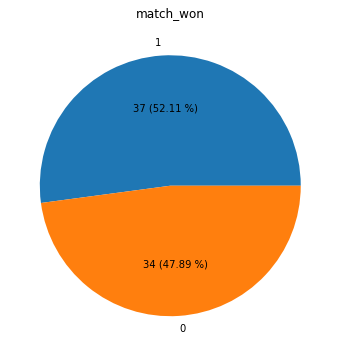

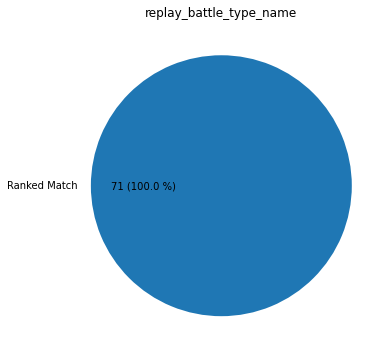

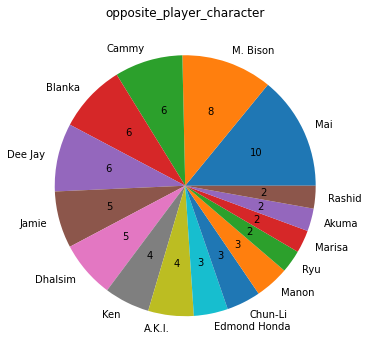

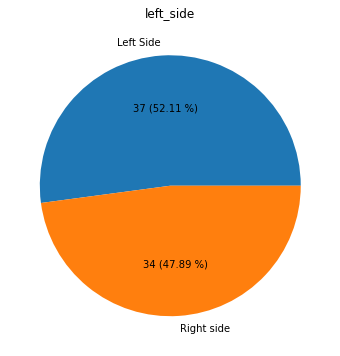

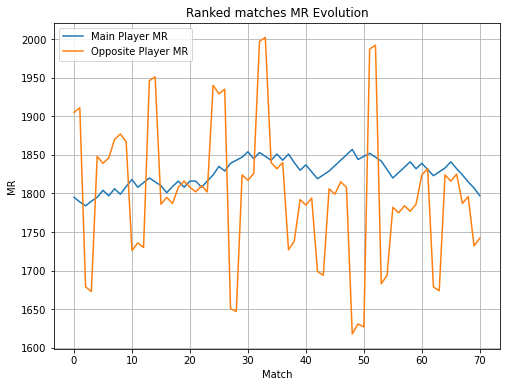

In [6]:
match_reports(df_last_session)

## Total matches stats

Number of matches: 280
--------------------
% of match won 54.64 %
--------------------
            match_won
left_side            
Left Side    0.542056
Right side   0.549133
--------------------
                           match_won
opposite_player_character           
A.K.I.                      0.272727
Akuma                       0.538462
Blanka                      0.666667
Cammy                       0.560000
Chun-Li                     0.571429
Dee Jay                     0.529412
Dhalsim                     0.333333
Ed                          0.200000
Edmond Honda                0.500000
Guile                       0.200000
JP                          0.642857
Jamie                       0.529412
Juri                        0.666667
Ken                         0.850000
Kimberly                    0.583333
Lily                        0.714286
Luke                        0.727273
M. Bison                    0.800000
Mai                         0.518519
Manon                     

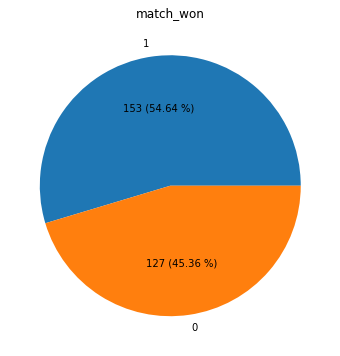

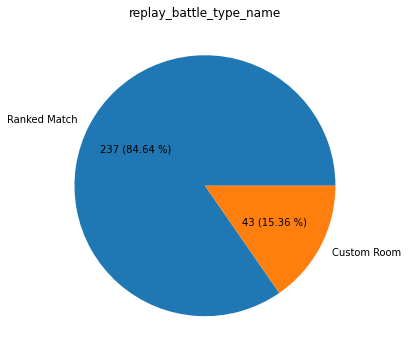

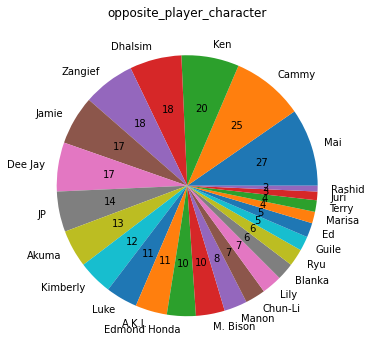

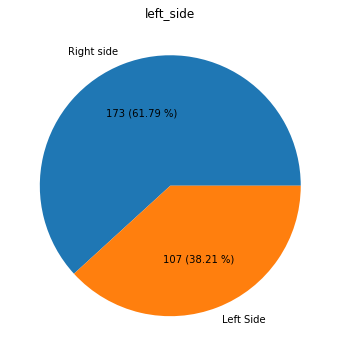

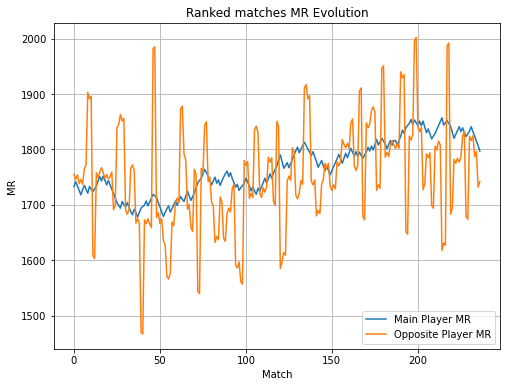

In [7]:
match_reports(data)